In [1]:
# import os
# import shutil
# import SimpleITK as sitk  # noqa: N813
import numpy as np
# import itk
# import tempfile
import monai
# from monai.data import PILReader
from monai.transforms import *
# from monai.config import print_config
from pathlib import Path
from monai.networks.nets import SwinUNETR
import torch
print(monai.__version__)
torch.cuda.set_device(0)


1.0.1


In [6]:
files = [
    "train/1/surface_volume/00.tif",
    "train/1/surface_volume/01.tif",
    "train/1/surface_volume/02.tif",
    "train/1/surface_volume/03.tif",
    "train/1/surface_volume/04.tif",
    "train/1/surface_volume/05.tif",
    "train/1/surface_volume/06.tif",
    "train/1/surface_volume/07.tif",
    "train/1/surface_volume/08.tif",
    "train/1/surface_volume/09.tif",
    "train/1/surface_volume/10.tif",
    "train/1/surface_volume/11.tif",
    "train/1/surface_volume/12.tif",
    "train/1/surface_volume/13.tif",
    "train/1/surface_volume/14.tif",
    "train/1/surface_volume/15.tif",
    "train/1/surface_volume/16.tif",
    "train/1/surface_volume/17.tif",
    "train/1/surface_volume/18.tif",
    "train/1/surface_volume/19.tif",
    "train/1/surface_volume/20.tif",
    "train/1/surface_volume/21.tif",
    "train/1/surface_volume/22.tif",
    "train/1/surface_volume/23.tif",
    "train/1/surface_volume/24.tif",
    "train/1/surface_volume/25.tif",
    "train/1/surface_volume/26.tif",
    "train/1/surface_volume/27.tif",
    "train/1/surface_volume/28.tif",
    "train/1/surface_volume/29.tif",
    "train/1/surface_volume/30.tif",
    "train/1/surface_volume/31.tif",
    "train/1/surface_volume/32.tif",
    "train/1/surface_volume/33.tif",
    "train/1/surface_volume/34.tif",
    "train/1/surface_volume/35.tif",
    "train/1/surface_volume/36.tif",
    "train/1/surface_volume/37.tif",
    "train/1/surface_volume/38.tif",
    "train/1/surface_volume/39.tif",
    "train/1/surface_volume/40.tif",
    "train/1/surface_volume/41.tif",
    "train/1/surface_volume/42.tif",
    "train/1/surface_volume/43.tif",
    "train/1/surface_volume/44.tif",
    "train/1/surface_volume/45.tif",
    "train/1/surface_volume/46.tif",
    "train/1/surface_volume/47.tif",
    "train/1/surface_volume/48.tif",
    "train/1/surface_volume/49.tif",
    "train/1/surface_volume/50.tif",
    "train/1/surface_volume/51.tif",
    "train/1/surface_volume/52.tif",
    "train/1/surface_volume/53.tif",
    "train/1/surface_volume/54.tif",
    "train/1/surface_volume/55.tif",
    "train/1/surface_volume/56.tif",
    "train/1/surface_volume/57.tif",
    "train/1/surface_volume/58.tif",
    "train/1/surface_volume/59.tif",
    "train/1/surface_volume/60.tif",
    "train/1/surface_volume/61.tif",
    "train/1/surface_volume/62.tif",
    "train/1/surface_volume/63.tif",
    "train/1/surface_volume/64.tif"
]
ROOT = Path(r'/root/autodl-tmp/vesuvius-challenge-ink-detection/')
files = [ROOT / f for f in files]

In [19]:
from monai.transforms.transform import Transform
class Copy(Transform):
    def __init__(self, num_channel):
        self.num_channel = num_channel

    def __call__(self, data):
        assert isinstance(data, torch.Tensor)
        data = data.repeat(1, self.num_channel, 1, 1)  # output = (batch_size=1, num_channel, H, W)
        return data
    


In [23]:
seg, _ = LoadImage(image_only=False, reader='PILReader')(ROOT / 'train' / '1'/ 'mask.png')
seg = AddChannel()(seg)
print(seg.size())
seg = Copy(10)(seg)
print(seg.size())

torch.Size([1, 6330, 8181])
torch.Size([1, 10, 6330, 8181])


In [7]:
# print("Loading data...")
raw, meta = LoadImage(image_only=False, reader='PILReader')(files)
seg, _ = LoadImage(image_only=False, reader='PILReader')(ROOT / 'train' / '1'/ 'mask.png')
# print(f"image data shape: {raw.shape}")
# print(f"image data shape: {seg.shape}")
# raw = AddChannel()(raw)
# seg = AddChannel()(seg)
# print(f"image data shape: {raw.shape}")
# print(f"image data shape: {seg.shape}")
# raw = Orientation(axcodes="RAS")(raw)
# seg = Orientation(axcodes="RAS")(seg)
# print(f"image data shape: {raw.shape}")
# raw = Spacing(pixdim=(1.5, 1.5, 2.0), mode="bilinear")(raw)
# seg = Spacing(pixdim=(1.5, 1.5, 2.0), mode="bilinear")(seg)
# print(f"image data shape: {raw.shape}")
# raw = ScaleIntensityRange(
#     a_min=-175, a_max=175, b_min=0.0, b_max=1.0, clip=True
# )(raw)
# print(f"image data shape: {raw.shape}")
# raw = CropForeground( source_key="image")(raw)
# seg = CropForeground( source_key="image")(seg)
# print(f"image data shape: {raw.shape}")
# raw = RandCropByPosNegLabel(
#     label=None,
#     spatial_size=(96, 96, 96),
#     pos=1,
#     neg=1,
#     num_samples=4,
#     image_threshold=0,
# )(raw, label=seg)
# print(f"image data shape: {raw.shape}")
# raw = RandFlip( prob=0.2, spatial_axis=0)(raw)
# print(f"image data shape: {raw.shape}")
# raw = RandFlip( prob=0.2, spatial_axis=1)(raw)
# print(f"image data shape: {raw.shape}")
# raw = RandFlip( prob=0.2, spatial_axis=2)(raw)
# print(f"image data shape: {raw.shape}")
# raw = RandRotate90( prob=0.2, max_k=3)(raw)
# print(f"image data shape: {raw.shape}")
# raw = RandScaleIntensity(factors=0.1, prob=0.1)(raw)
# print(f"image data shape: {raw.shape}")
# raw = RandShiftIntensity(offsets=0.1, prob=0.1)(raw)
# print(f"image data shape: {raw.shape}")
# raw = ToTensor()(raw)
# print(f"{type(raw)}")
# raw = torch.Tensor(raw).cuda(0)
# print(f"{type(raw)}")


ValueError: buffer is not large enough

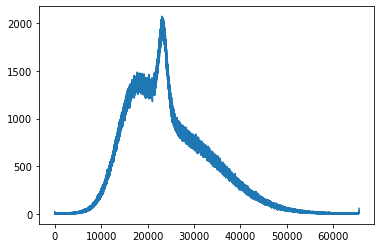

In [4]:
raw.shape
import numpy as np
import matplotlib.pyplot as plt
# 创建一个NumPy数组

# 使用numpy.unique函数计算各个元素的出现次数
unique_elements, counts = np.unique(raw, return_counts=True)
plt.plot(unique_elements[1:len(unique_elements)-1], counts[1:len(unique_elements)-1])
plt.show()

In [23]:
# raw_croped = raw[:,1000:1100,1000:1100]
# data = torch.Tensor(raw_croped).view(1, raw_croped.shape[0], raw_croped.shape[1], raw_croped.shape[2]).cuda(0)

# (batch_size, in_channel, H, W, D)
data = torch.rand((1, 1, 64, 64, 64)).cuda(0)
data.size()


torch.Size([1, 1, 64, 64, 64])

In [22]:
model = SwinUNETR(
    img_size=(64, 64, 64),
    in_channels=1,
    out_channels=1,
    feature_size=12,
    use_checkpoint=True,
).cuda(0)

model.eval()

SwinUNETR(
  (swinViT): SwinTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(1, 12, kernel_size=(2, 2, 2), stride=(2, 2, 2))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (layers1): ModuleList(
      (0): BasicLayer(
        (blocks): ModuleList(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=12, out_features=36, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=12, out_features=12, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path): Identity()
            (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
            (mlp): MLPBlock(
              (linear1): Linear(in_features=12, out_features=48, bias=True)
              (linear2): Linear(in_features=48, ou

In [24]:
torch.cuda.empty_cache()
with torch.no_grad():
    out = model(data)
print(type(out))
print(out.size())
del out, data
torch.cuda.empty_cache()

<class 'torch.Tensor'>
torch.Size([1, 1, 64, 64, 64])


None of the inputs have requires_grad=True. Gradients will be None
